# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

/Users/hpathak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

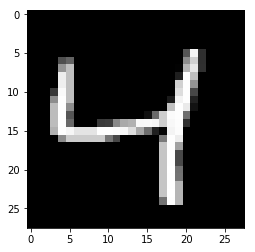

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(dtype=tf.float32,shape=(None, image_size), name='inputs')
targets_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='targets')


# Output of hidden layer, single fully connected layer here with ReLU activation

encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 5
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/5... Training loss: 0.6948
Epoch: 1/5... Training loss: 0.6914
Epoch: 1/5... Training loss: 0.6879
Epoch: 1/5... Training loss: 0.6842
Epoch: 1/5... Training loss: 0.6795
Epoch: 1/5... Training loss: 0.6746
Epoch: 1/5... Training loss: 0.6676
Epoch: 1/5... Training loss: 0.6597
Epoch: 1/5... Training loss: 0.6495
Epoch: 1/5... Training loss: 0.6402
Epoch: 1/5... Training loss: 0.6270
Epoch: 1/5... Training loss: 0.6125
Epoch: 1/5... Training loss: 0.6001
Epoch: 1/5... Training loss: 0.5816
Epoch: 1/5... Training loss: 0.5664
Epoch: 1/5... Training loss: 0.5474
Epoch: 1/5... Training loss: 0.5325
Epoch: 1/5... Training loss: 0.5142
Epoch: 1/5... Training loss: 0.4949
Epoch: 1/5... Training loss: 0.4777
Epoch: 1/5... Training loss: 0.4577
Epoch: 1/5... Training loss: 0.4419
Epoch: 1/5... Training loss: 0.4301
Epoch: 1/5... Training loss: 0.4094
Epoch: 1/5... Training loss: 0.3959
Epoch: 1/5... Training loss: 0.3880
Epoch: 1/5... Training loss: 0.3761
Epoch: 1/5... Training loss:

Epoch: 1/5... Training loss: 0.1924
Epoch: 1/5... Training loss: 0.1972
Epoch: 1/5... Training loss: 0.1909
Epoch: 1/5... Training loss: 0.1849
Epoch: 1/5... Training loss: 0.1916
Epoch: 1/5... Training loss: 0.1946
Epoch: 1/5... Training loss: 0.1935
Epoch: 1/5... Training loss: 0.1890
Epoch: 1/5... Training loss: 0.1856
Epoch: 1/5... Training loss: 0.1892
Epoch: 1/5... Training loss: 0.1897
Epoch: 1/5... Training loss: 0.1881
Epoch: 1/5... Training loss: 0.1955
Epoch: 1/5... Training loss: 0.1920
Epoch: 1/5... Training loss: 0.1917
Epoch: 1/5... Training loss: 0.1917
Epoch: 1/5... Training loss: 0.1912
Epoch: 1/5... Training loss: 0.1869
Epoch: 1/5... Training loss: 0.1927
Epoch: 1/5... Training loss: 0.1888
Epoch: 1/5... Training loss: 0.1892
Epoch: 1/5... Training loss: 0.1902
Epoch: 1/5... Training loss: 0.1911
Epoch: 1/5... Training loss: 0.1868
Epoch: 1/5... Training loss: 0.1865
Epoch: 1/5... Training loss: 0.1936
Epoch: 1/5... Training loss: 0.1831
Epoch: 1/5... Training loss:

Epoch: 2/5... Training loss: 0.1610
Epoch: 2/5... Training loss: 0.1580
Epoch: 2/5... Training loss: 0.1599
Epoch: 2/5... Training loss: 0.1533
Epoch: 2/5... Training loss: 0.1611
Epoch: 2/5... Training loss: 0.1589
Epoch: 2/5... Training loss: 0.1542
Epoch: 2/5... Training loss: 0.1608
Epoch: 2/5... Training loss: 0.1605
Epoch: 2/5... Training loss: 0.1541
Epoch: 2/5... Training loss: 0.1621
Epoch: 2/5... Training loss: 0.1536
Epoch: 2/5... Training loss: 0.1567
Epoch: 2/5... Training loss: 0.1603
Epoch: 2/5... Training loss: 0.1625
Epoch: 2/5... Training loss: 0.1585
Epoch: 2/5... Training loss: 0.1526
Epoch: 2/5... Training loss: 0.1607
Epoch: 2/5... Training loss: 0.1550
Epoch: 2/5... Training loss: 0.1531
Epoch: 2/5... Training loss: 0.1606
Epoch: 2/5... Training loss: 0.1514
Epoch: 2/5... Training loss: 0.1635
Epoch: 2/5... Training loss: 0.1584
Epoch: 2/5... Training loss: 0.1557
Epoch: 2/5... Training loss: 0.1546
Epoch: 2/5... Training loss: 0.1533
Epoch: 2/5... Training loss:

Epoch: 3/5... Training loss: 0.1381
Epoch: 3/5... Training loss: 0.1362
Epoch: 3/5... Training loss: 0.1390
Epoch: 3/5... Training loss: 0.1379
Epoch: 3/5... Training loss: 0.1369
Epoch: 3/5... Training loss: 0.1343
Epoch: 3/5... Training loss: 0.1322
Epoch: 3/5... Training loss: 0.1346
Epoch: 3/5... Training loss: 0.1353
Epoch: 3/5... Training loss: 0.1362
Epoch: 3/5... Training loss: 0.1396
Epoch: 3/5... Training loss: 0.1373
Epoch: 3/5... Training loss: 0.1343
Epoch: 3/5... Training loss: 0.1370
Epoch: 3/5... Training loss: 0.1359
Epoch: 3/5... Training loss: 0.1359
Epoch: 3/5... Training loss: 0.1347
Epoch: 3/5... Training loss: 0.1373
Epoch: 3/5... Training loss: 0.1337
Epoch: 3/5... Training loss: 0.1350
Epoch: 3/5... Training loss: 0.1355
Epoch: 3/5... Training loss: 0.1352
Epoch: 3/5... Training loss: 0.1336
Epoch: 3/5... Training loss: 0.1364
Epoch: 3/5... Training loss: 0.1315
Epoch: 3/5... Training loss: 0.1368
Epoch: 3/5... Training loss: 0.1377
Epoch: 3/5... Training loss:

Epoch: 4/5... Training loss: 0.1231
Epoch: 4/5... Training loss: 0.1231
Epoch: 4/5... Training loss: 0.1264
Epoch: 4/5... Training loss: 0.1243
Epoch: 4/5... Training loss: 0.1280
Epoch: 4/5... Training loss: 0.1217
Epoch: 4/5... Training loss: 0.1209
Epoch: 4/5... Training loss: 0.1263
Epoch: 4/5... Training loss: 0.1228
Epoch: 4/5... Training loss: 0.1242
Epoch: 4/5... Training loss: 0.1257
Epoch: 4/5... Training loss: 0.1261
Epoch: 4/5... Training loss: 0.1207
Epoch: 4/5... Training loss: 0.1221
Epoch: 4/5... Training loss: 0.1225
Epoch: 4/5... Training loss: 0.1204
Epoch: 4/5... Training loss: 0.1242
Epoch: 4/5... Training loss: 0.1213
Epoch: 4/5... Training loss: 0.1220
Epoch: 4/5... Training loss: 0.1246
Epoch: 4/5... Training loss: 0.1213
Epoch: 4/5... Training loss: 0.1255
Epoch: 4/5... Training loss: 0.1200
Epoch: 4/5... Training loss: 0.1197
Epoch: 4/5... Training loss: 0.1261
Epoch: 4/5... Training loss: 0.1228
Epoch: 4/5... Training loss: 0.1216
Epoch: 4/5... Training loss:

Epoch: 5/5... Training loss: 0.1139
Epoch: 5/5... Training loss: 0.1197
Epoch: 5/5... Training loss: 0.1122
Epoch: 5/5... Training loss: 0.1169
Epoch: 5/5... Training loss: 0.1168
Epoch: 5/5... Training loss: 0.1147
Epoch: 5/5... Training loss: 0.1210
Epoch: 5/5... Training loss: 0.1149
Epoch: 5/5... Training loss: 0.1156
Epoch: 5/5... Training loss: 0.1168
Epoch: 5/5... Training loss: 0.1201
Epoch: 5/5... Training loss: 0.1182
Epoch: 5/5... Training loss: 0.1144
Epoch: 5/5... Training loss: 0.1184
Epoch: 5/5... Training loss: 0.1196
Epoch: 5/5... Training loss: 0.1148
Epoch: 5/5... Training loss: 0.1155
Epoch: 5/5... Training loss: 0.1148
Epoch: 5/5... Training loss: 0.1158
Epoch: 5/5... Training loss: 0.1203
Epoch: 5/5... Training loss: 0.1135
Epoch: 5/5... Training loss: 0.1184
Epoch: 5/5... Training loss: 0.1122
Epoch: 5/5... Training loss: 0.1173
Epoch: 5/5... Training loss: 0.1150
Epoch: 5/5... Training loss: 0.1124
Epoch: 5/5... Training loss: 0.1178
Epoch: 5/5... Training loss:

Epoch: 5/5... Training loss: 0.1100
Epoch: 5/5... Training loss: 0.1097
Epoch: 5/5... Training loss: 0.1116
Epoch: 5/5... Training loss: 0.1101
Epoch: 5/5... Training loss: 0.1113
Epoch: 5/5... Training loss: 0.1063
Epoch: 5/5... Training loss: 0.1116
Epoch: 5/5... Training loss: 0.1059
Epoch: 5/5... Training loss: 0.1092
Epoch: 5/5... Training loss: 0.1100
Epoch: 5/5... Training loss: 0.1089
Epoch: 5/5... Training loss: 0.1052
Epoch: 5/5... Training loss: 0.1131
Epoch: 5/5... Training loss: 0.1112
Epoch: 5/5... Training loss: 0.1127
Epoch: 5/5... Training loss: 0.1078
Epoch: 5/5... Training loss: 0.1104
Epoch: 5/5... Training loss: 0.1084
Epoch: 5/5... Training loss: 0.1094
Epoch: 5/5... Training loss: 0.1090
Epoch: 5/5... Training loss: 0.1068
Epoch: 5/5... Training loss: 0.1071
Epoch: 5/5... Training loss: 0.1068
Epoch: 5/5... Training loss: 0.1093
Epoch: 5/5... Training loss: 0.1074
Epoch: 5/5... Training loss: 0.1059
Epoch: 5/5... Training loss: 0.1101
Epoch: 5/5... Training loss:

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

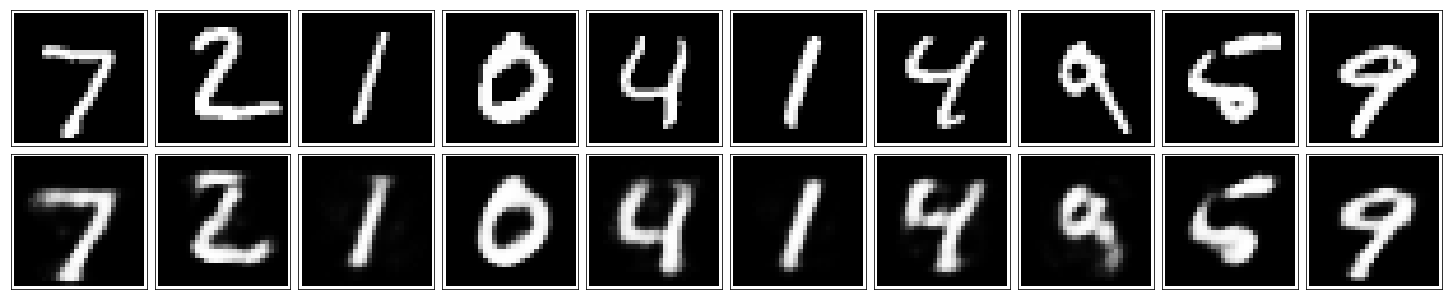

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.